In [1]:
import numpy as np
import transfer as t
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 72

In [2]:
locked = t.load("../Data/transfer/100-300k-1.212m-2.2kHz-6.12G-10KPI-Locked_000.csv")
error = t.load("../Data/transfer/1.212m-Error-Port_000.csv")

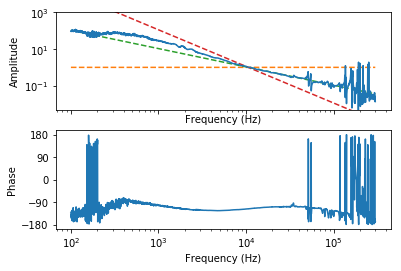

In [14]:
# Calculate Transfer function from measured data
lok = locked[0]
err = error[0]
trans = err/lok - 1
tFig = trans.plot()
tFig.savefig("ahh.png", format="png")

In [4]:
#Measured and Simulated Low Pass Filters
lpRaw = t.load("../Data/transfer/2.2Hz Filter 100-300k_000.csv")[0]
cables = t.load("../Data/transfer/19-03-07-Cables 100-300k_000.csv")[0]
lp = lpRaw/cables
#Compare Simulated and Measured LP Filter
#lpFig = lp.plot(lines=False)
#lpSimFig = t.lp(2200).plot(lp.f, lines=False)
comp = t.plot_funcs([lp, t.lp(2200).apply(lp.f)],["Data", "Simulated"])

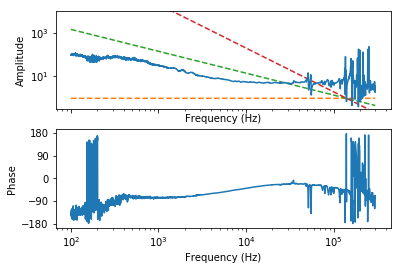

In [5]:
# Divide low pass from data
lprTrans = trans / lp
lprTransFig = lprTrans.plot(lines=True)

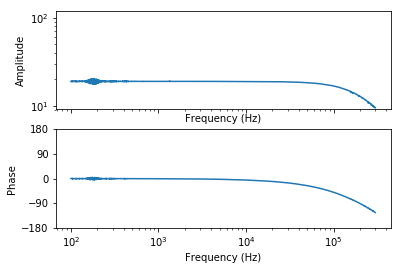

In [6]:
# Amplifier transfer function
ampRaw = t.load("../Data/transfer/19-03-07-Amplifier Cavity_000.csv")[0]
amp = ampRaw/cables
ampFig = amp.plot(lines=False)

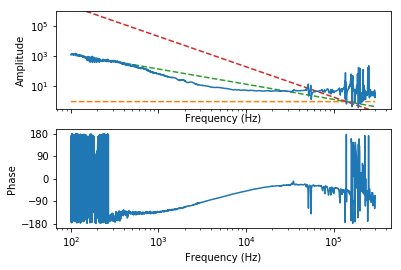

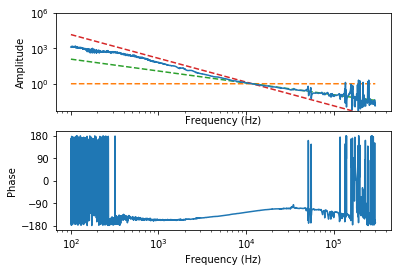

In [7]:
#Low Frequency Path
lfp = lprTrans * t.lp(100) * amp
#High Frequency Path
hfp = lprTrans * t.hp(100)

total = lfp + hfp
stFig = total.plot()
lpstFig = (total * t.lp(2200)).plot()

In [8]:
total_comp = t.plot_funcs([total, lprTrans],["Split Locking","Regular"]);
total_lp_comp = t.plot_funcs([total * t.lp(2200), trans],["Split Locking","Regular"]);

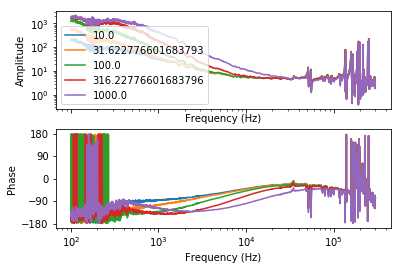

In [9]:
# Varying cuttoff frequency.
funcs = []
for cutoff in np.logspace(1,3,5):
    #Low Frequency Path
    lfp = lprTrans * t.lp(cutoff) * amp
    #High Frequency Path
    hfp = lprTrans * t.hp(cutoff)

    funcs.append(lfp + hfp)
t.plot_funcs(funcs,np.logspace(1,3,5))

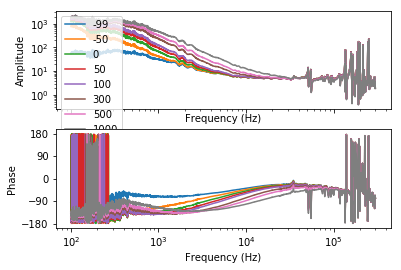

In [10]:
# Varying spacing between cuttoff frequencies
funcs = []
for cutoff in [-99,-50,0,50,100,300,500,1000]:
    #Low Frequency Path
    lfp = lprTrans * t.lp(100+cutoff) * amp
    #High Frequency Path
    hfp = lprTrans * t.hp(100)

    funcs.append(lfp + hfp)
t.plot_funcs(funcs,[-99,-50,0,50,100,300,500,1000])

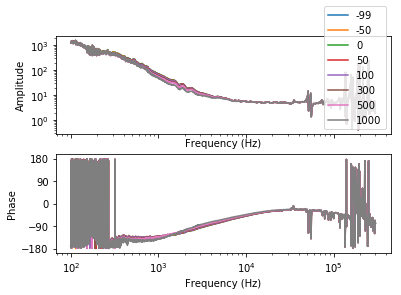

In [11]:
# Varying spacing between cuttoff frequencies
funcs = []
for cutoff in [-99,-50,0,50,100,300,500,1000]:
    #Low Frequency Path
    lfp = lprTrans * t.lp(100) * amp
    #High Frequency Path
    hfp = lprTrans * t.hp(100 + cutoff)

    funcs.append(lfp + hfp)
t.plot_funcs(funcs,[-99,-50,0,50,100,300,500,1000])